In [5]:

import numpy as npy
import pandas as pds
pds.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as statistics
import matplotlib.pyplot as plt


In [6]:
election_data = pds.read_csv('Lok+Sabha_2019.csv')

In [7]:
election_data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


## Question 1: Identify the State/UT with the highest and lowest total votes.

Text(0, 0.5, 'Total Votes')

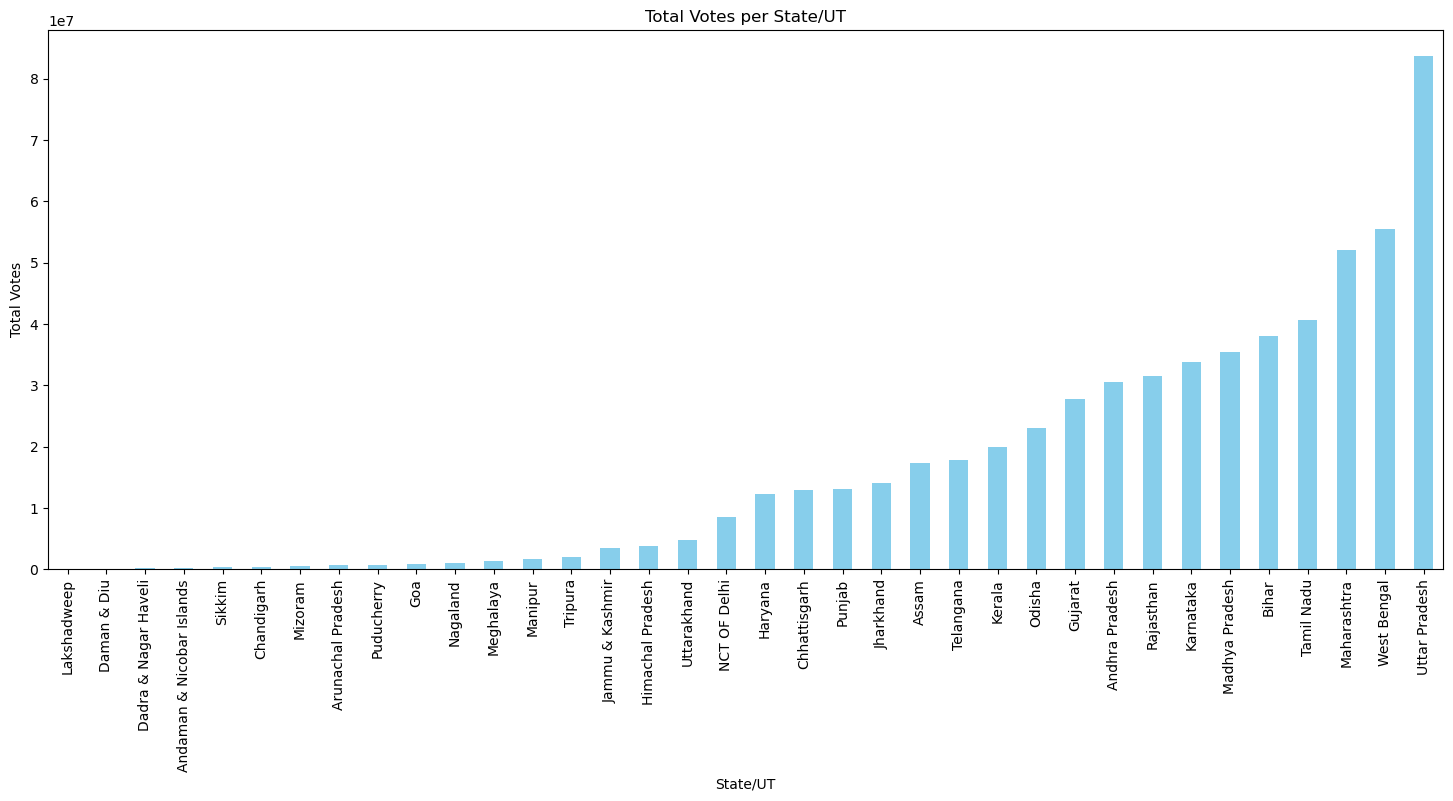

In [8]:

plt.figure(figsize=(18,7))
election_data.groupby('STATE').sum()['TOTAL VOTES'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Votes per State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Votes')


From the bar chart,
1. Uttar Pradesh contributes the most no. of total votes - 14.2%
2. Lakshadweep contributes the least no. of total votes - 0.0078%

# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [16]:
election_data.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values(ascending = True)

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

### Candidates from ALATHUR constituency on an average seems to contribute least towards the amount of assets declared with an avg amount of approx. 2.2 mln rupees

In [17]:
election_data.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values(ascending = False)

CONSTITUENCY
CHEVELLA          3927395902.00
CHHINDWARA        1655144708.25
GUNA              1296719487.00
NELLORE           1289469814.67
BANGALORE RURAL   1230421937.67
                       ...     
BOLPUR               4090779.40
ALIPURDUARS          3895905.50
GAYA (SC)            3796683.45
VILUPPURAM           3032143.33
ALATHUR              2165624.67
Name: ASSETS, Length: 539, dtype: float64

Chevella constituency on an average  contribute most towards the amount of assets declared with an avg amount  3.9 bln rupees

# 3. Consider  liabilities. Describe and explain across the Education level? Provide a detailed justification for your answer.

In [18]:
election_datanew = election_data.groupby('EDUCATION')['ASSETS']
election_datanew = election_datanew.describe().T
election_datanew.loc[('Total'), :] = election_datanew.sum()

In [19]:
election_datanew

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,3955096093.68,3245339762.15,9734736773.75,1706401329.95,4828585184.90


From the above table,
Candidates with a Doctorate degree report the highest average assets, whereas those with just a Basic education level declare the least on average.
Graduates contribute the most to the cumulative declared assets, while Illiterate candidates account for the smallest total declared assets.

In [27]:
election_data_lia = election_data.groupby('EDUCATION')['LIABILITIES']
election_data_lia_des = election_data_lia.describe().T
election_data_lia_des.loc[('Total'), :] = election_data_lia.sum()

In [28]:
election_data_lia_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,777.00,55.00,503.00
mean,21598924.78,8972111.25,18852620.89,19511916.51,21383130.71
std,99416300.01,25885435.30,74590853.58,73095280.61,106208631.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,500000.00,1127000.00,1387000.00,1935504.00,980000.00
75%,4575793.25,2623964.00,7450651.00,7845260.50,6474886.00
max,1350000000.00,137800000.00,1079582000.00,534644785.00,1547511439.00
Total,12700167770.00,654964121.00,14648486430.00,1073155408.00,10755714746.00


From the above table,
1. Candidates with a Basic education level, on average, report the highest declared liabilities, while those holding Doctorate degrees declare the least average liabilities.
2. Graduates account for the largest cumulative declared liabilities, while candidates with Doctorate degrees contribute the smallest total declared liabilities.

Text(0.5, 0, 'Post Graduate')

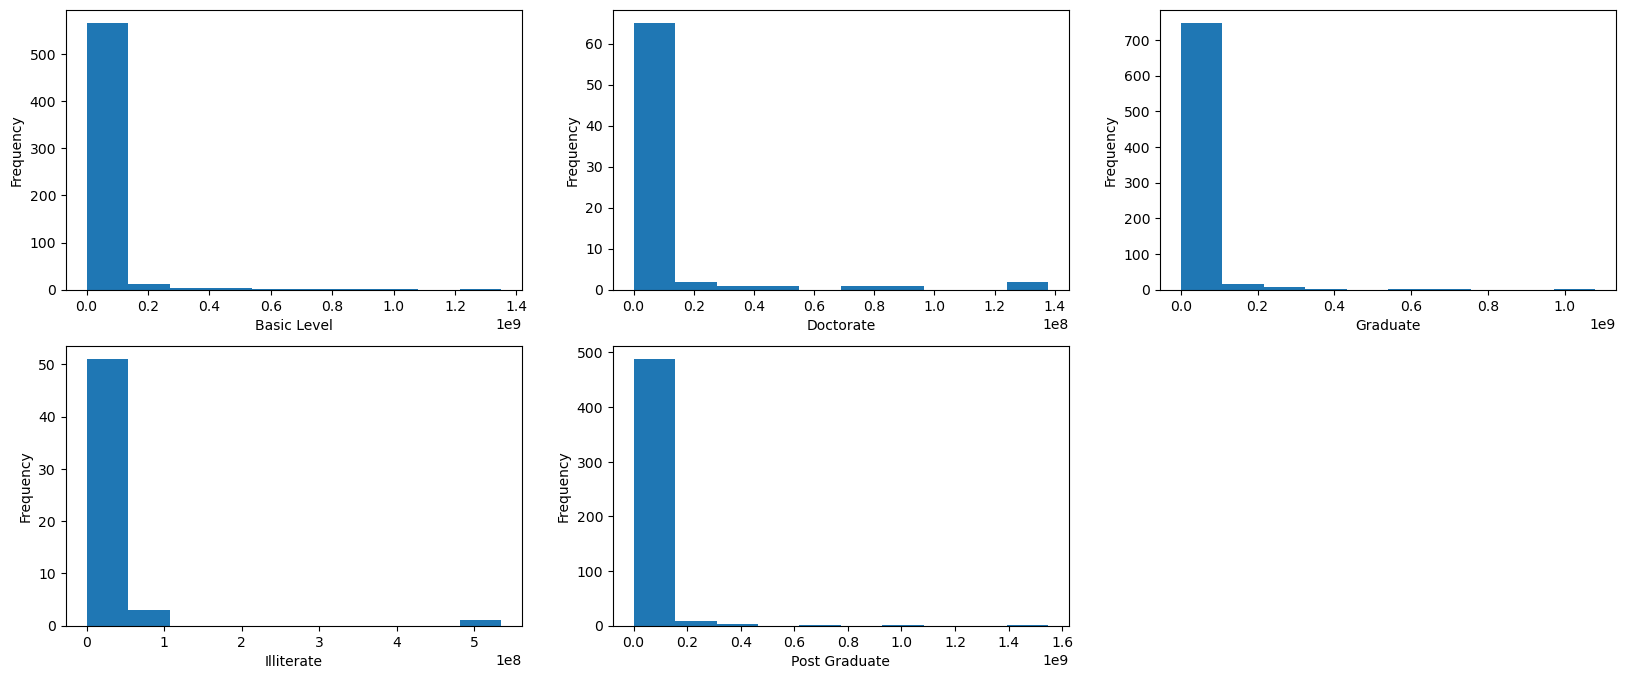

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
election_data_lia.get_group('Basic Level').plot(kind = 'hist')
plt.xlabel('Basic Level')
plt.subplot(2,3,2)
election_data_lia.get_group('Doctorate').plot(kind = 'hist')
plt.xlabel('Doctorate')
plt.subplot(2,3,3)
election_data_lia.get_group('Graduate').plot(kind = 'hist')
plt.xlabel('Graduate')
plt.subplot(2,3,4)
election_data_lia.get_group('Illiterate').plot(kind = 'hist')
plt.xlabel('Illiterate')
plt.subplot(2,3,5)
election_data_lia.get_group('Post Graduate').plot(kind = 'hist')
plt.xlabel('Post Graduate')

# 4. Are there any outliers in liabilities across Education level? Back up your answer with a suitable plot/technique.

Text(0.5, 0, 'Post Graduate')

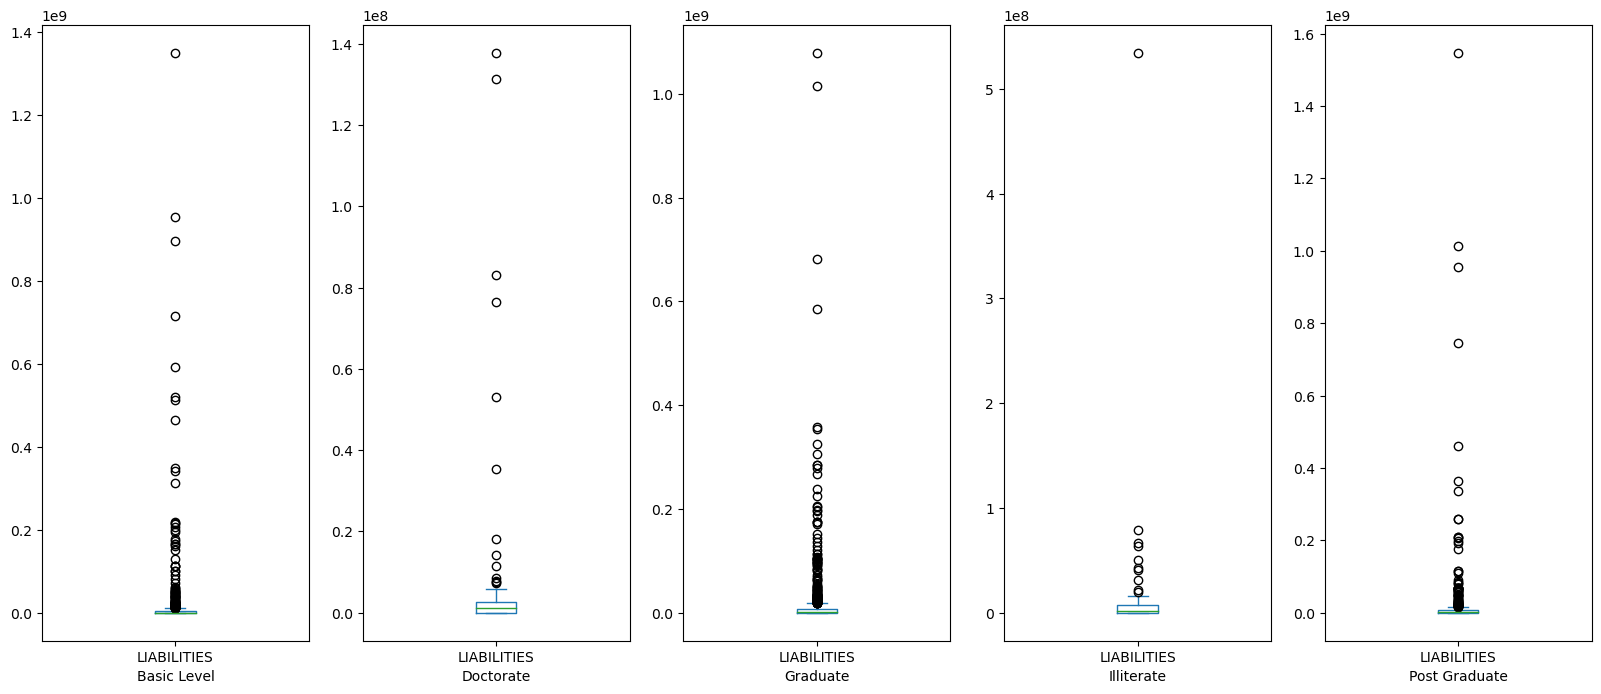

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
election_data_lia.get_group('Basic Level').plot(kind = 'box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
election_data_lia.get_group('Doctorate').plot(kind = 'box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
election_data_lia.get_group('Graduate').plot(kind = 'box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
election_data_lia.get_group('Illiterate').plot(kind = 'box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
election_data_lia.get_group('Post Graduate').plot(kind = 'box')
plt.xlabel('Post Graduate')

Box plot  presentation to show the outliers.\